In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
.libPaths(c("/content/drive/MyDrive/Colab Notebooks/R_lib", .libPaths()))

In [2]:
.libPaths(c("/content/drive/MyDrive/Colab Notebooks/R_lib", .libPaths()))
library(limma)
library(dplyr)
library(tidyverse)
library(pheatmap)
library(EnhancedVolcano)
library(ggplot2)
library(plotly)
library(EnhancedVolcano)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: ggrepel


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [3]:
results_H.PyloriInfection_Vs_Control = read.csv("results_H.PyloriInfection_Vs_Control.csv")

[1] "Upregulated"     "Downregulated"   "Not_Significant"

Warning message:
“Removed 28125 rows containing missing values or values outside the scale range
(`geom_text()`).”


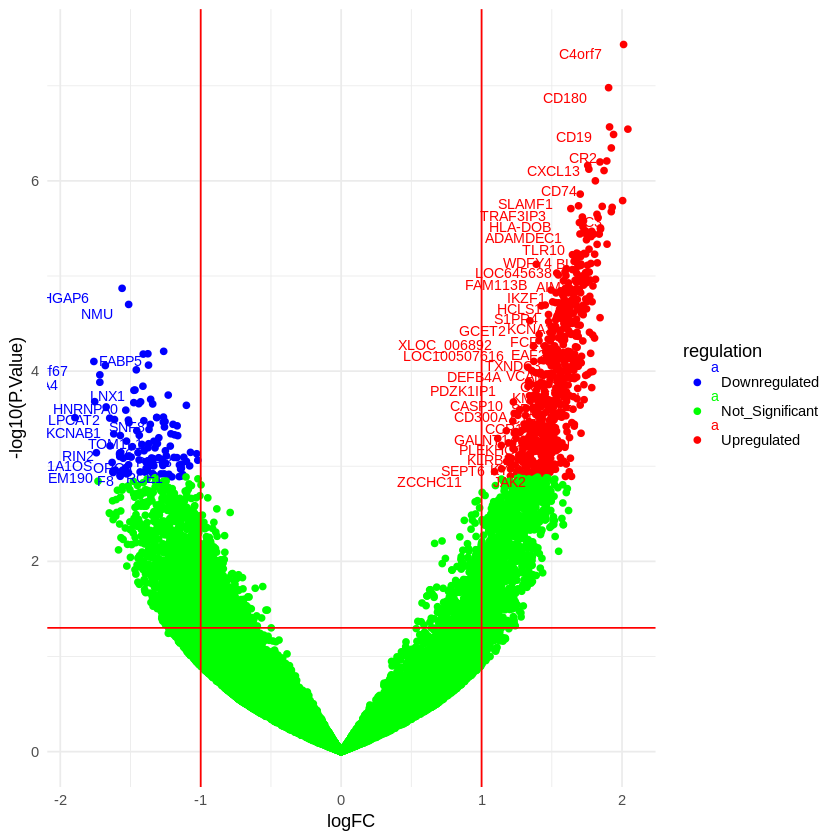

In [4]:
unique(results_H.PyloriInfection_Vs_Control$regulation)

results_H.PyloriInfection_Vs_Control$label <- ifelse(
  results_H.PyloriInfection_Vs_Control$regulation %in% c("Upregulated", "Downregulated"),
  results_H.PyloriInfection_Vs_Control$label,
  NA
)

# Create the base plot
p <- ggplot(data = results_H.PyloriInfection_Vs_Control,
            aes(x = logFC, y = -log10(P.Value), col = regulation)) +
  geom_point() +
  theme_minimal() +
  geom_vline(xintercept = c(-1, 1), col = "red") +
  geom_hline(yintercept = -log10(0.05), col = "red") +
  scale_color_manual(values = c("Downregulated" = "blue", "Upregulated" = "red", "Not_Significant" = "green"))

# Add gene labels for significant genes (avoiding overlap)
p <- p + geom_text(aes(label = label), vjust = 1.5, hjust = 1.5, size = 3, check_overlap = TRUE)

print(p)

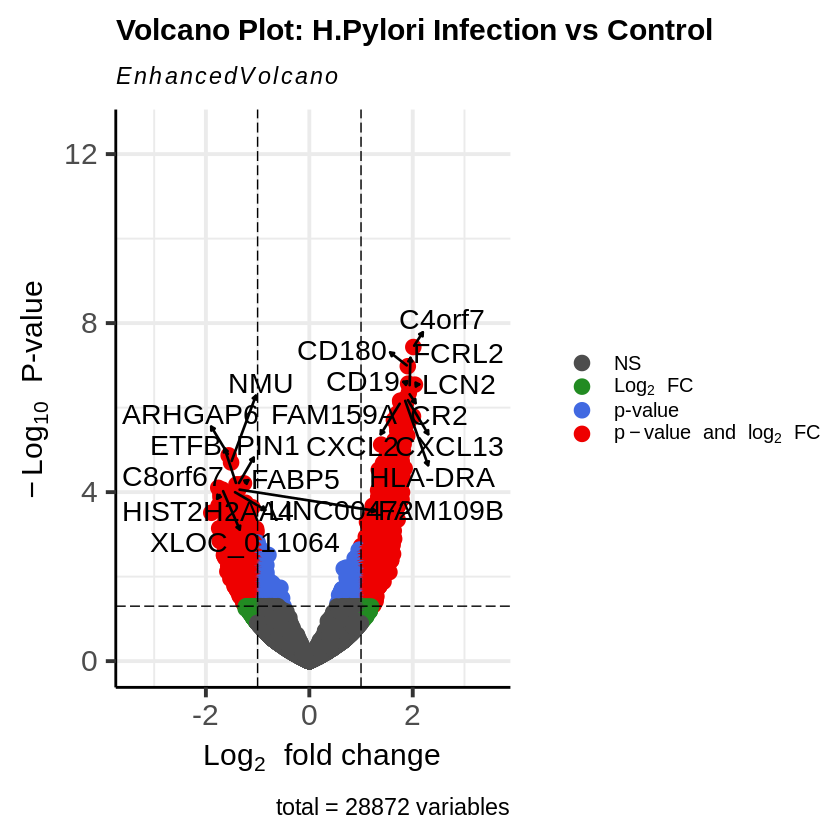

In [6]:
# Create Volcano Plot
EnhancedVolcano(
  results_H.PyloriInfection_Vs_Control,
  lab = results_H.PyloriInfection_Vs_Control$label,
  x = 'logFC',
  y = 'P.Value',
  selectLab = c("C4orf7", "CD180", "CD19", "LCN2", "FCRL2", "CR2", "CXCL13", "HLA-DRA",
                "FAM159A", "CXCL2", "ARHGAP6", "NMU", "FABP5", "PIN1", "ETFB", "C8orf67",
                "FAM109B", "XLOC_011064", "LINC00472", "HIST2H2AA4"),
  xlab = bquote(~Log[2]~ 'fold change'),
  ylab = bquote(~-Log[10]~ 'P-value'),
  pCutoff = 0.05,
  FCcutoff = 1,
  pointSize = 4.0,
  labSize = 6.0,
  colAlpha = 1,
  legendPosition = 'right',
  legendLabSize = 12,
  legendIconSize = 4.0,
  drawConnectors = TRUE,
  widthConnectors = 0.75,
  colConnectors = 'black',
  col = c('grey30', 'forestgreen', 'royalblue', 'red2'),
  title = "Volcano Plot: H.Pylori Infection vs Control",
  max.overlaps = 50
)